# Autoencoder Analysis

Primero cargamos las letras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def print_letter(char):
    # get char data
    image_data = data[char]
    image = image_data.reshape(7, 5)
    # Display 
    plt.imshow(image, cmap='gray_r') 
    plt.title(f'Letter: {char}')
    plt.axis('off')
    plt.show()

def load_data():
    font_data = [
        [0x04, 0x04, 0x02, 0x00, 0x00, 0x00, 0x00],   # 0x60, `
        [0x00, 0x0e, 0x01, 0x0d, 0x13, 0x13, 0x0d],   # 0x61, a
        [0x10, 0x10, 0x10, 0x1c, 0x12, 0x12, 0x1c],   # 0x62, b
        [0x00, 0x00, 0x00, 0x0e, 0x10, 0x10, 0x0e],   # 0x63, c
        [0x01, 0x01, 0x01, 0x07, 0x09, 0x09, 0x07],   # 0x64, d
        [0x00, 0x00, 0x0e, 0x11, 0x1f, 0x10, 0x0f],   # 0x65, e
        [0x06, 0x09, 0x08, 0x1c, 0x08, 0x08, 0x08],   # 0x66, f
        [0x0e, 0x11, 0x13, 0x0d, 0x01, 0x01, 0x0e],   # 0x67, g
        [0x10, 0x10, 0x10, 0x16, 0x19, 0x11, 0x11],   # 0x68, h
        [0x00, 0x04, 0x00, 0x0c, 0x04, 0x04, 0x0e],   # 0x69, i
        [0x02, 0x00, 0x06, 0x02, 0x02, 0x12, 0x0c],   # 0x6a, j
        [0x10, 0x10, 0x12, 0x14, 0x18, 0x14, 0x12],   # 0x6b, k
        [0x0c, 0x04, 0x04, 0x04, 0x04, 0x04, 0x04],   # 0x6c, l
        [0x00, 0x00, 0x0a, 0x15, 0x15, 0x11, 0x11],   # 0x6d, m
        [0x00, 0x00, 0x16, 0x19, 0x11, 0x11, 0x11],   # 0x6e, n
        [0x00, 0x00, 0x0e, 0x11, 0x11, 0x11, 0x0e],   # 0x6f, o
        [0x00, 0x1c, 0x12, 0x12, 0x1c, 0x10, 0x10],   # 0x70, p
        [0x00, 0x07, 0x09, 0x09, 0x07, 0x01, 0x01],   # 0x71, q
        [0x00, 0x00, 0x16, 0x19, 0x10, 0x10, 0x10],   # 0x72, r
        [0x00, 0x00, 0x0f, 0x10, 0x0e, 0x01, 0x1e],   # 0x73, s
        [0x08, 0x08, 0x1c, 0x08, 0x08, 0x09, 0x06],   # 0x74, t
        [0x00, 0x00, 0x11, 0x11, 0x11, 0x13, 0x0d],   # 0x75, u
        [0x00, 0x00, 0x11, 0x11, 0x11, 0x0a, 0x04],   # 0x76, v
        [0x00, 0x00, 0x11, 0x11, 0x15, 0x15, 0x0a],   # 0x77, w
        [0x00, 0x00, 0x11, 0x0a, 0x04, 0x0a, 0x11],   # 0x78, x
        [0x00, 0x11, 0x11, 0x0f, 0x01, 0x11, 0x0e],   # 0x79, y
        [0x00, 0x00, 0x1f, 0x02, 0x04, 0x08, 0x1f],   # 0x7a, z
        [0x06, 0x08, 0x08, 0x10, 0x08, 0x08, 0x06],   # 0x7b, {
        [0x04, 0x04, 0x04, 0x00, 0x04, 0x04, 0x04],   # 0x7c, |
        [0x0c, 0x02, 0x02, 0x01, 0x02, 0x02, 0x0c],   # 0x7d, }
        [0x08, 0x15, 0x02, 0x00, 0x00, 0x00, 0x00],   # 0x7e, ~
        [0x1f, 0x1f, 0x1f, 0x1f, 0x1f, 0x1f, 0x1f]    # 0x7f, DEL
    ]
    images = []
    for char in font_data:
        image = []
        for row in char:
            bits = [(row >> i) & 1 for i in range(4, -1, -1)]  # 5 bits per row
            image.extend(bits)
        images.append(image)
    data_array = np.array(images, dtype=np.float32)

    # Create a list of characters from ASCII codes 0x60 to 0x7e
    char_list = [chr(i) for i in range(0x60, 0x7f)]  # Up to 0x7e
    char_list.append('DEL')  # Append 'DEL' for the last character

    # Map each character to its corresponding data
    data_dict = {c: data_array[i] for i, c in enumerate(char_list)}
    return data_dict

# Load the data and prepare the training set
data = load_data()
training_data = [(x.reshape(-1, 1), x.reshape(-1, 1)) for x in data.values()]



Mostramos las letras para chequear que están bien

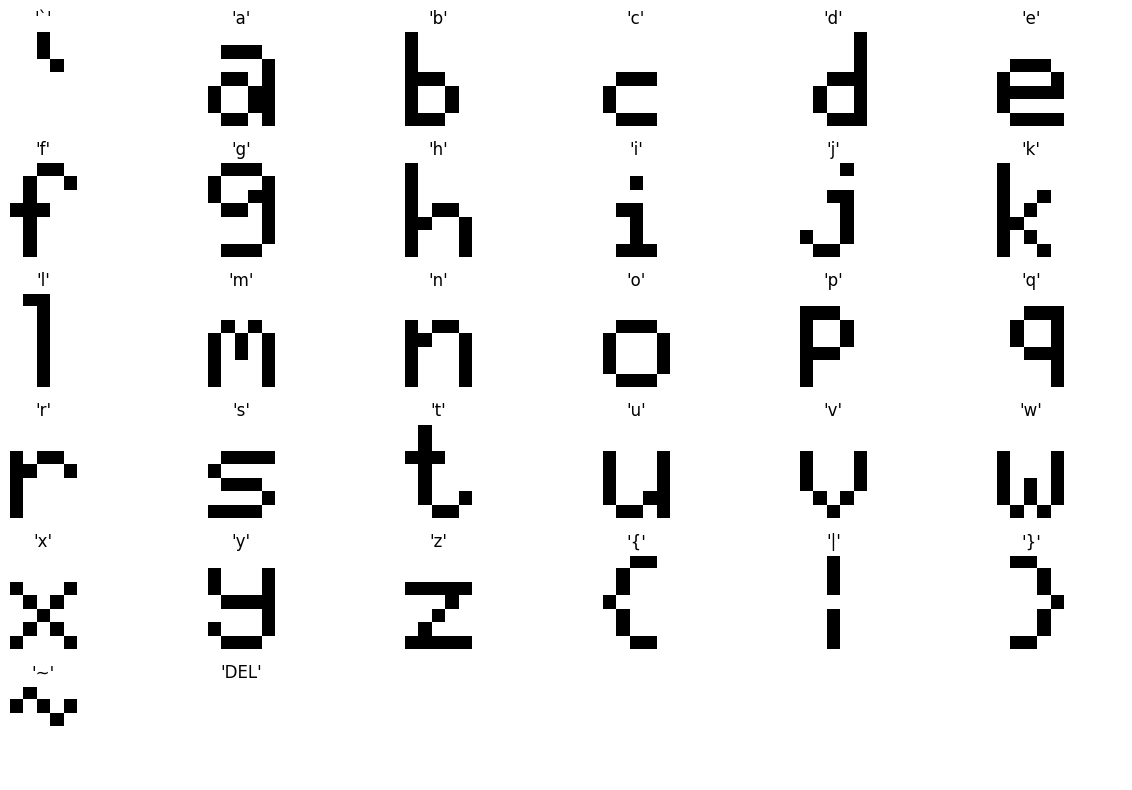

In [3]:
import matplotlib.pyplot as plt

def display_training_data(training_data, data_keys):
    # Number of letters
    num_letters = len(training_data)

    # Set up the grid for displaying the letters
    cols = 6  # Number of columns
    rows = (num_letters // cols) + (num_letters % cols > 0)  # Calculate rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()  # Flatten to easily iterate

    for i, (x, _, char) in enumerate(zip([x[0] for x in training_data], [y[1] for y in training_data], data_keys)):
        # Reshape the input back to 7x5 for display
        letter_image = x.reshape(7, 5)

        # Plot each letter
        axes[i].imshow(letter_image, cmap='gray_r')
        axes[i].set_title(f"'{char}'")
        axes[i].axis('off')

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Include labels in training data
training_data_with_labels = [(x.reshape(-1, 1), x.reshape(-1, 1), char) for char, x in data.items()]

# Display the training data as letters
display_training_data(training_data_with_labels, list(data.keys()))


In [ ]:
len(training_data)


In [ ]:
from core.activation_function import ActivationFunction
from core.optimizer import Optimizer
from core.multilayer_perceptron import MultilayerPerceptron
import matplotlib.pyplot as plt

# Define the topology and other settings
topology = [35, 100, 20, 50, 10, 2, 10, 50, 20, 100, 35]
activation_function = ActivationFunction(method='tanh')
optimizer = Optimizer(
    method='adam',
    eta=0.01,
)

mlp = MultilayerPerceptron(
    seed=42,
    topology=topology,
    activation_function=activation_function,
    optimizer=optimizer
)

# Training parameters
epochs = 2000
pixel_error_history = mlp.fit(
    training_data=training_data, 
    epochs=epochs, 
    mini_batch_size=6,
    patience=1000,
    min_delta=1e-5,
)

# Ensure the error history is padded to the full 2000 epochs
if len(pixel_error_history) < epochs:
    pixel_error_history += [pixel_error_history[-1]] * (epochs - len(pixel_error_history))

# Plot the training error
plt.plot(range(epochs), pixel_error_history)
plt.xlabel('Epoch')
plt.ylabel('Incorrect pixels')
plt.title('Pixel error per epoch')
plt.show()


In [ ]:
def compute_pixel_errors(mlp, data):
    errors = []
    for x, y in data:
        output = mlp.feedforward(x)
        predicted = output >= 0.5  # Umbral en 0.5 para binarizar
        actual = y
        num_errors = np.sum(predicted != actual)
        errors.append(num_errors)
    return errors

errors = compute_pixel_errors(mlp, training_data)
print("Máximo error de píxeles:", max(errors))


In [ ]:
import matplotlib.pyplot as plt

# Obtener las representaciones latentes
latent_representations = [mlp.encode(x) for x, y in training_data]
latent_representations = [z.flatten() for z in latent_representations]
latent_representations = np.array(latent_representations)

# Etiquetas de los caracteres
labels = [chr(0x60 + i) for i in range(32)]  # Desde 0x60 en adelante

# Graficar
plt.figure(figsize=(8, 6))
for i, point in enumerate(latent_representations):
    plt.scatter(point[0], point[1])
    plt.text(point[0]+0.02, point[1]+0.02, labels[i], fontsize=9)
plt.title('2D Latent Space')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.grid(True)
plt.show()


In [ ]:
# Define a grid in latent space
grid_x = np.linspace(latent_representations[:, 0].min() - 1, latent_representations[:, 0].max() + 1, 15)
grid_y = np.linspace(latent_representations[:, 1].min() - 1, latent_representations[:, 1].max() + 1, 15)

# Create a grid of latent points
grid = np.array([[x, y] for y in grid_y for x in grid_x])

# Decode the grid points into images
decoded_images = [mlp.decode(latent.reshape(-1, 1)) for latent in grid]
decoded_images = [img.reshape(7, 5) for img in decoded_images]

# Plot the decoded images on the grid
fig, axes = plt.subplots(len(grid_y), len(grid_x), figsize=(10, 10))
for i, y in enumerate(grid_y):
    for j, x in enumerate(grid_x):
        axes[i, j].imshow(decoded_images[i * len(grid_x) + j], cmap='gray_r')
        axes[i, j].axis('off')
plt.suptitle("Grid Sampling in 2D Latent Space", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Define the range of movement in latent space
x_min, x_max = latent_representations[:, 0].min(), latent_representations[:, 0].max()
y_min, y_max = latent_representations[:, 1].min(), latent_representations[:, 1].max()

# Generate a smoother sinusoidal path
steps = 500  # Increase steps for smoothness
x_values = np.linspace(x_min, x_max, steps)  # Linear progression in x
y_values = np.sin(2 * np.pi * x_values / (x_max - x_min)) * (y_max - y_min) * 0.4  # Larger, smoother sinusoidal variation
random_path = np.column_stack((x_values, y_values))

# Initialize the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Set up the scatter plot on the left
scatter_ax = axes[0]
scatter_ax.scatter(latent_representations[:, 0], latent_representations[:, 1], alpha=0.6, label='Latent Points')
point_plot, = scatter_ax.plot([], [], 'ro', label='Moving Point')  # Red dot for the moving point

# Add labels to each point
labels = [chr(0x60 + i) for i in range(len(latent_representations))]  # Characters corresponding to points
for i, (x, y) in enumerate(latent_representations):
    scatter_ax.text(x + 0.02, y + 0.02, labels[i], fontsize=8)

scatter_ax.set_title("Latent Space")
scatter_ax.set_xlabel("Dimension 1")
scatter_ax.set_ylabel("Dimension 2")
scatter_ax.legend()

# Set up the decoded representation on the right
image_ax = axes[1]
decoded_image = image_ax.imshow(np.zeros((7, 5)), cmap='gray_r', vmin=0, vmax=1)  # Placeholder with normalization
image_ax.set_title("Decoded Representation")
image_ax.axis('off')

# Update function for the animation
def update(frame):
    point = random_path[frame]
    point_plot.set_data([point[0]], [point[1]])  # Update moving point (as sequences)
    decoded = mlp.decode(point.reshape(-1, 1))  # Decode the latent point
    decoded = decoded.reshape(7, 5)  # Ensure it matches the expected image dimensions
    decoded_image.set_data(decoded)  # Update the decoded image
    return point_plot, decoded_image

# Create the animation
ani = FuncAnimation(fig, update, frames=len(random_path), blit=True)

# Save the animation as a GIF with a lower frame rate for slower playback
writer = PillowWriter(fps=10)  # Reduced FPS for slower animation
ani.save("latent_space_smooth_large_sine.gif", writer=writer)

plt.close()
print("GIF saved as latent_space_smooth_large_sine.gif")


In [ ]:
grid_x = np.linspace(latent_representations[:, 0].min() - 1, latent_representations[:, 0].max() + 1, 30)
grid_y = np.linspace(latent_representations[:, 1].min() - 1, latent_representations[:, 1].max() + 1, 30)
grid = np.array([[x, y] for y in grid_y for x in grid_x])

decoded_images = [mlp.decode(point.reshape(-1, 1)).reshape(7, 5) for point in grid]
fig, axes = plt.subplots(len(grid_y), len(grid_x), figsize=(15, 15))
for i, y in enumerate(grid_y):
    for j, x in enumerate(grid_x):
        axes[i, j].imshow(decoded_images[i * len(grid_x) + j], cmap='gray_r')
        axes[i, j].axis('off')
plt.suptitle("Latent Space Decoded Grid")
plt.tight_layout()
plt.show()


In [ ]:
letter_used= 'a'
f_point = latent_representations[labels.index(letter_used)]
decoded_f = mlp.decode(f_point.reshape(-1, 1)).reshape(7, 5)
plt.imshow(decoded_f, cmap='gray_r')
plt.title(f"Reconstructed '{letter_used}'")
plt.axis('off')
plt.show()


In [ ]:
# Function for linear interpolation
def interpolate(p1, p2, steps=10):
    return [(1 - t) * p1 + t * p2 for t in np.linspace(0, 1, steps)]

# Pick two random latent points
latent_point1 = latent_representations[0] # input index here
latent_point2 = latent_representations[4] # input index here

# Generate interpolated points
interpolated_points = interpolate(latent_point1, latent_point2, steps=10)

# Decode interpolated points
transition_images = [mlp.decode(latent.reshape(-1, 1)) for latent in interpolated_points]
transition_images = [img.reshape(7, 5) for img in transition_images]

# Plot the morphing
fig, axes = plt.subplots(1, len(transition_images), figsize=(15, 3))
for i, img in enumerate(transition_images):
    axes[i].imshow(img, cmap='gray_r')
    axes[i].axis('off')
plt.suptitle("Morphing Between Two Latent Points", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
letter_1 = 'a'
letter_2 = 'e'

print_letter(letter_1)
print_letter(letter_2)

z1 = mlp.encode(data[letter_1].reshape(-1, 1))  
z2 = mlp.encode(data[letter_2].reshape(-1, 1)) 
z_new = (z1 + z2) / 2  # Punto medio en el espacio latente

# una vez encodeados los dos sacamos el promedio de los dos y luego decodificamos
new_image = mlp.decode(z_new)
new_image = new_image.reshape(7, 5)

# Mostrar la imagen generada
plt.imshow(new_image, cmap='gray_r')
plt.title('Nueva Letra Generada')
plt.axis('off')
plt.show()


# Denoising AutoEncoder

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from core.optimizer import Optimizer
from core.activation_function import ActivationFunction
from core.multilayer_perceptron import MultilayerPerceptron

# Function to add Gaussian noise at different levels
def add_gaussian_noise(data, std_dev):
    noisy_data = []
    for x in data:
        noise = np.random.normal(0, std_dev, x.shape)
        noisy_x = x + noise
        noisy_x = np.clip(noisy_x, 0, 1)  # Ensure values are within [0, 1]
        noisy_data.append(noisy_x)
    return noisy_data

# Assuming 'training_data' is a list of tuples (x, y), where x is the input vector
# Extract the clean inputs
clean_data = [x for x, _ in training_data]
labels = [y for _, y in training_data]

# Add noise to create noisy inputs for training
noise_std_dev = 0.2  # Noise level for training data
noisy_inputs = add_gaussian_noise(clean_data, std_dev=noise_std_dev)

# Prepare training pairs: (noisy_input, clean_target)
training_pairs = list(zip(noisy_inputs, clean_data))

# Define the network topology (symmetric autoencoder)
topology = [35, 50, 25, 12, 25, 50, 35]

# Define optimizer and activation function
optimizer = Optimizer(method='adam', eta=0.01, weight_decay=0)
activation_function = ActivationFunction(method='tanh')

# Initialize the Autoencoder
autoencoder = MultilayerPerceptron(
    seed=42,
    topology=topology,
    activation_function=activation_function,
    optimizer=optimizer
)

# Train the Autoencoder
# Ensure your fit method accepts input-target pairs
pixel_error_history = autoencoder.fit(
    training_data=training_pairs,
    epochs=10000,
    mini_batch_size=6,
    patience=1000,
    min_delta=1e-5
)




Epoch 1/10000, Pixel error: 371
Epoch 2/10000, Pixel error: 371
Epoch 3/10000, Pixel error: 368
Epoch 4/10000, Pixel error: 328
Epoch 5/10000, Pixel error: 319
Epoch 6/10000, Pixel error: 305
Epoch 7/10000, Pixel error: 305
Epoch 8/10000, Pixel error: 301
Epoch 9/10000, Pixel error: 284
Epoch 10/10000, Pixel error: 273
Epoch 11/10000, Pixel error: 272
Epoch 12/10000, Pixel error: 265
Epoch 13/10000, Pixel error: 263
Epoch 14/10000, Pixel error: 263
Epoch 15/10000, Pixel error: 262
Epoch 16/10000, Pixel error: 267
Epoch 17/10000, Pixel error: 266
Epoch 18/10000, Pixel error: 260
Epoch 19/10000, Pixel error: 262
Epoch 20/10000, Pixel error: 261
Epoch 21/10000, Pixel error: 259
Epoch 22/10000, Pixel error: 264
Epoch 23/10000, Pixel error: 252
Epoch 24/10000, Pixel error: 257
Epoch 25/10000, Pixel error: 259
Epoch 26/10000, Pixel error: 268
Epoch 27/10000, Pixel error: 249
Epoch 28/10000, Pixel error: 250
Epoch 29/10000, Pixel error: 248
Epoch 30/10000, Pixel error: 245
Epoch 31/10000, Pix

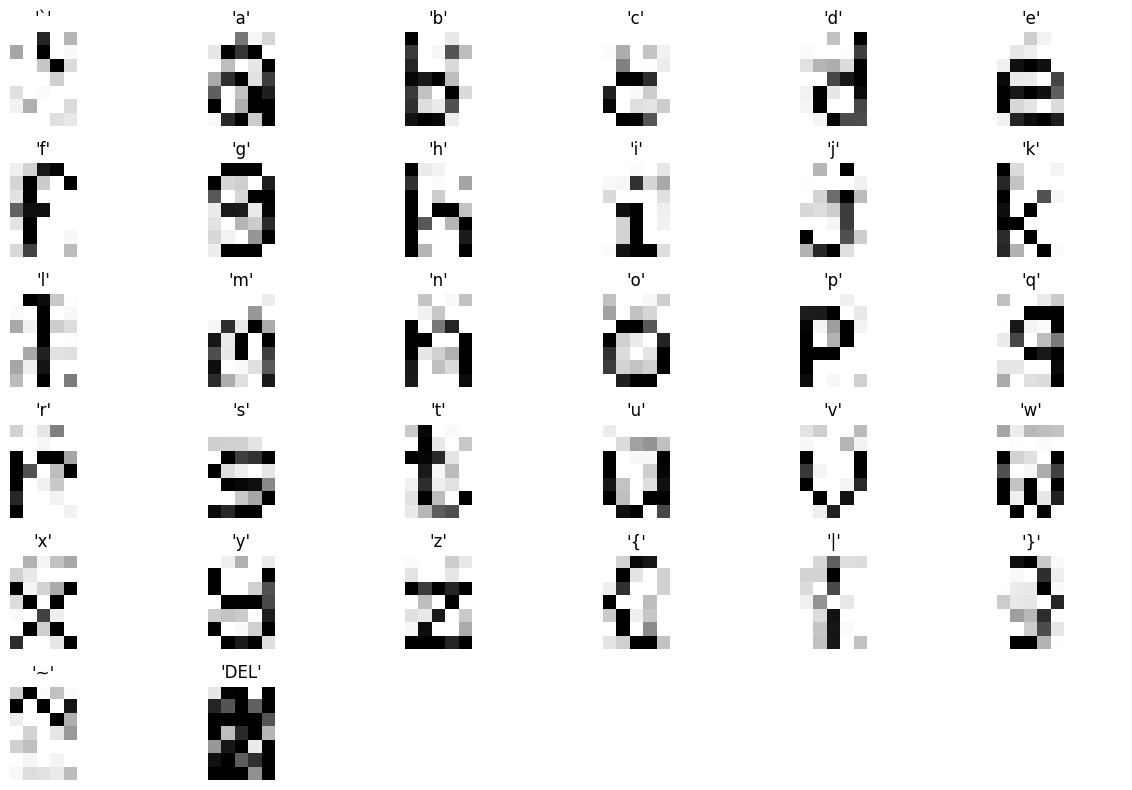

In [28]:
def display_denoising_results(model, training_pairs, labels):
    import matplotlib.pyplot as plt

    num_samples = len(labels)
    fig, axes = plt.subplots(3, num_samples, figsize=(num_samples * 1.5, 4.5))

    for i in range(num_samples):
        # Get the clean and noisy data
        noisy_x, clean_x = training_pairs[i]
        label = labels[i]

        # Get the reconstructed image from the model
        reconstructed_x = model.feedforward(noisy_x)

        # Reshape the data for visualization (assuming images are 7x5 pixels)
        clean_image = clean_x.reshape(7, 5)
        noisy_image = noisy_x.reshape(7, 5)
        reconstructed_image = reconstructed_x.reshape(7, 5)

        # Display the clean image
        axes[0, i].imshow(clean_image, cmap='gray_r')
        axes[0, i].axis('off')
        axes[0, i].set_title(f'{label}')

        # Display the noisy image
        axes[1, i].imshow(noisy_image, cmap='gray_r')
        axes[1, i].axis('off')

        # Display the reconstructed image
        axes[2, i].imshow(reconstructed_image, cmap='gray_r')
        axes[2, i].axis('off')

    plt.suptitle('Clean (Top), Noisy (Middle), Reconstructed (Bottom)')
    plt.tight_layout()
    plt.show()

display_training_data(training_pairs, list(data.keys()))


In [29]:

# Function to evaluate the model at different noise levels
def evaluate_denoising_performance(model, clean_data, noise_levels):
    for std_dev in noise_levels:
        noisy_data = add_gaussian_noise(clean_data, std_dev=std_dev)
        total_accuracy = 0
        for noisy_x, clean_x in zip(noisy_data, clean_data):
            reconstructed_x = model.feedforward(noisy_x)
            reconstructed_x_binary = (reconstructed_x > 0.5).astype(int)
            accuracy = np.mean((clean_x == reconstructed_x_binary).astype(float)) * 100
            total_accuracy += accuracy
        average_accuracy = total_accuracy / len(clean_data)
        print(f"Noise Std Dev: {std_dev}, Average Pixel Accuracy: {average_accuracy:.2f}%")

# Evaluate the Autoencoder at different noise levels
noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5]
evaluate_denoising_performance(autoencoder, clean_data, noise_levels)


Noise Std Dev: 0.1, Average Pixel Accuracy: 96.96%
Noise Std Dev: 0.2, Average Pixel Accuracy: 90.98%
Noise Std Dev: 0.3, Average Pixel Accuracy: 86.88%
Noise Std Dev: 0.4, Average Pixel Accuracy: 80.62%
Noise Std Dev: 0.5, Average Pixel Accuracy: 69.82%


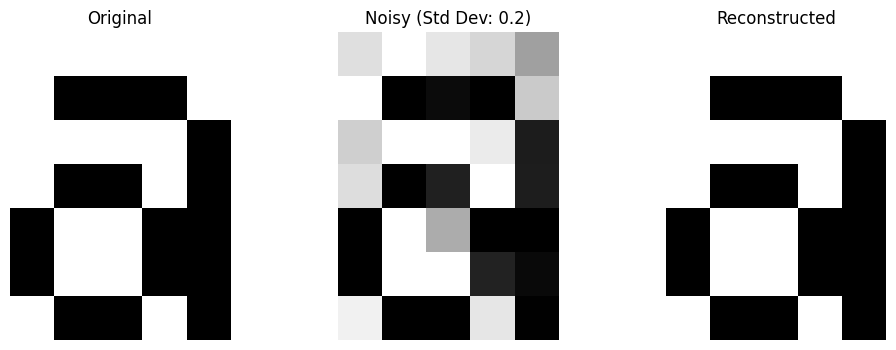

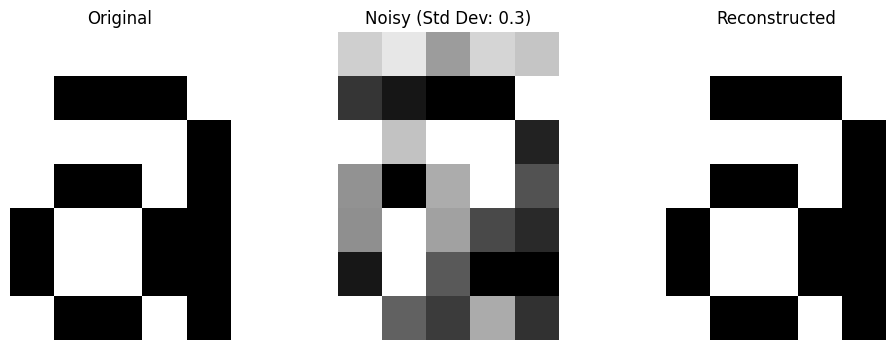

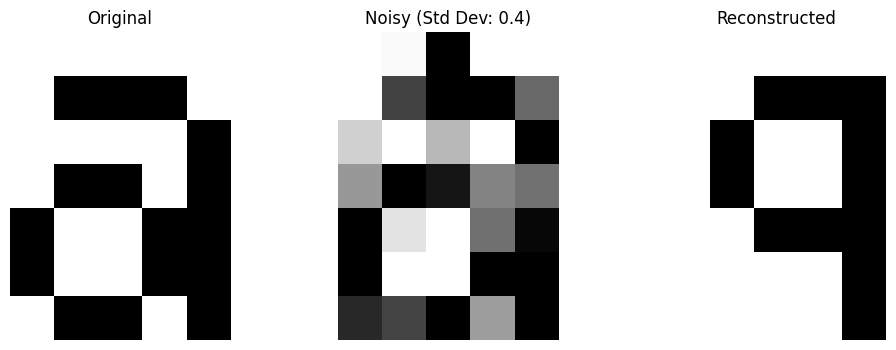

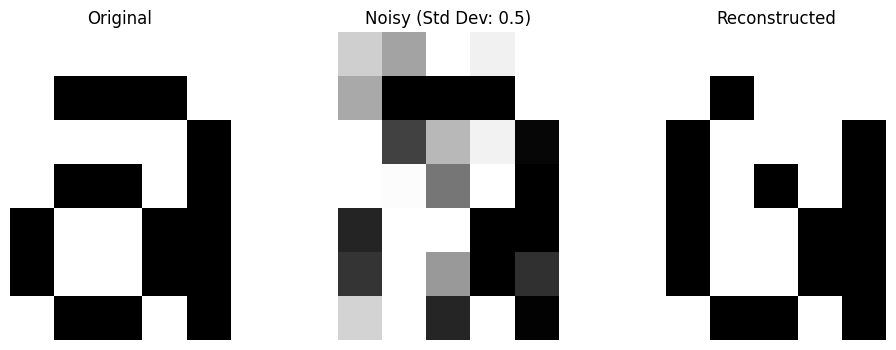

In [31]:
# Function to visualize the denoising effect
def visualize_denoising(model, clean_data, noise_std_dev):
    idx = 1
    original_x = clean_data[idx]
    noisy_x = add_gaussian_noise([original_x], std_dev=noise_std_dev)[0]
    reconstructed_x = model.feedforward(noisy_x)
    reconstructed_x_binary = (reconstructed_x > 0.5).astype(int)
    # Reshape for visualization (assuming images are 7x5 pixels)
    original_image = original_x.reshape(7, 5)
    noisy_image = noisy_x.reshape(7, 5)
    reconstructed_image = reconstructed_x_binary.reshape(7, 5)
    # Plot the images
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(original_image, cmap='gray_r')
    axes[0].set_title('Original')
    axes[0].axis('off')
    axes[1].imshow(noisy_image, cmap='gray_r')
    axes[1].set_title(f'Noisy (Std Dev: {noise_std_dev})')
    axes[1].axis('off')
    axes[2].imshow(reconstructed_image, cmap='gray_r')
    axes[2].set_title('Reconstructed')
    axes[2].axis('off')
    plt.show()

# Visualize the denoising effect at a specific noise level
visualize_denoising(autoencoder, clean_data, noise_std_dev=0.2)
visualize_denoising(autoencoder, clean_data, noise_std_dev=0.3)
visualize_denoising(autoencoder, clean_data, noise_std_dev=0.4)
visualize_denoising(autoencoder, clean_data, noise_std_dev=0.5)
